In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_db=pd.read_excel(r'E:\Work\dataset\flightrate\Data_Train.xlsx')

In [13]:
train_db.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_db.dropna(inplace= True)

In [14]:
train_db.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
#extracting date and month from Date_of_journey

train_db["Journey_day"] = pd.to_datetime(train_db["Date_of_Journey"], format = "%d/%m/%Y").dt.day
train_db["Journey_month"] = pd.to_datetime(train_db.Date_of_Journey, format = "%d/%m/%Y").dt.month
train_db.drop('Date_of_Journey',axis=1,inplace=True)

In [36]:
#Extracting hr and ins from Dep_Time
train_db['dep_hr']=pd.to_datetime(train_db['Dep_Time']).dt.hour
train_db['dep_min']=pd.to_datetime(train_db['Dep_Time']).dt.minute
train_db.drop('Dep_Time',axis=1,inplace=True)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [37]:
#Extracting hr and ins from Dep_Time
train_db['Arrival_hr']=pd.to_datetime(train_db['Arrival_Time']).dt.hour
train_db['Arrival_min']=pd.to_datetime(train_db['Arrival_Time']).dt.minute
train_db.drop('Arrival_Time',axis=1,inplace=True)
train_db

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [61]:
tot_duration=list(train_db['Duration'])
for i in range(len(tot_duration)):
    if len(tot_duration[i].split()) != 2:
        if 'h' in tot_duration[i]:
            tot_duration[i]=tot_duration[i].strip()+' 0m'
        else: tot_duration[i]='0h '+tot_duration[i]
tot_duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [80]:
hrs=[]
hrtomin=[]
mins=[]
tot_mins=[]
for i in range(len(tot_duration)):
    hrs.append(tot_duration[i].split('h')[0])
    hrtomin.append(int(hrs[i])*60)
    mins.append(tot_duration[i].split('m')[0].split()[-1])
    mins[i]=int(mins[i])
    tot_mins.append(hrtomin[i]+mins[i])
tot_mins

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [83]:
train_db['duration_in_mins']=tot_mins
train_db.drop('Duration',axis=1,inplace=True)

In [84]:
train_db

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,160


In [89]:
# Cleaning catagorical data by onehotencoder and lebelencoder for nominal and ordinal data respectively  

# working on nominal data first by onehotencoder method

airline=pd.get_dummies(train_db['Airline'],prefix='Airline',drop_first=True)
source=pd.get_dummies(train_db['Source'],prefix='Source',drop_first=True)
print(source)
destination=pd.get_dummies(train_db['Destination'],prefix='Dest',drop_first=True)
destination

       Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0                   0             0               0              0
1                   0             0               1              0
2                   0             1               0              0
3                   0             0               1              0
4                   0             0               0              0
...               ...           ...             ...            ...
10678               0             0               1              0
10679               0             0               1              0
10680               0             0               0              0
10681               0             0               0              0
10682               0             1               0              0

[10682 rows x 4 columns]


,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [100]:
train_db.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [108]:
train_db.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [104]:
# working with ordenal data with lebel encoder 
train_db['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [105]:
train_db.replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [109]:
train_db

,Total_Stops,Price,Journey_day,Journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_in_mins
0,0,3897,24,3,22,20,1,10,170
1,2,7662,1,5,5,50,13,15,445
2,2,13882,9,6,9,25,4,25,1140
3,1,6218,12,5,18,5,23,30,325
4,1,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,150
10679,0,4145,27,4,20,45,23,20,155
10680,0,7229,27,4,8,20,11,20,180
10681,0,12648,1,3,11,30,14,10,160


In [126]:
final_train=pd.concat([train_db,source,destination,airline],axis=1)


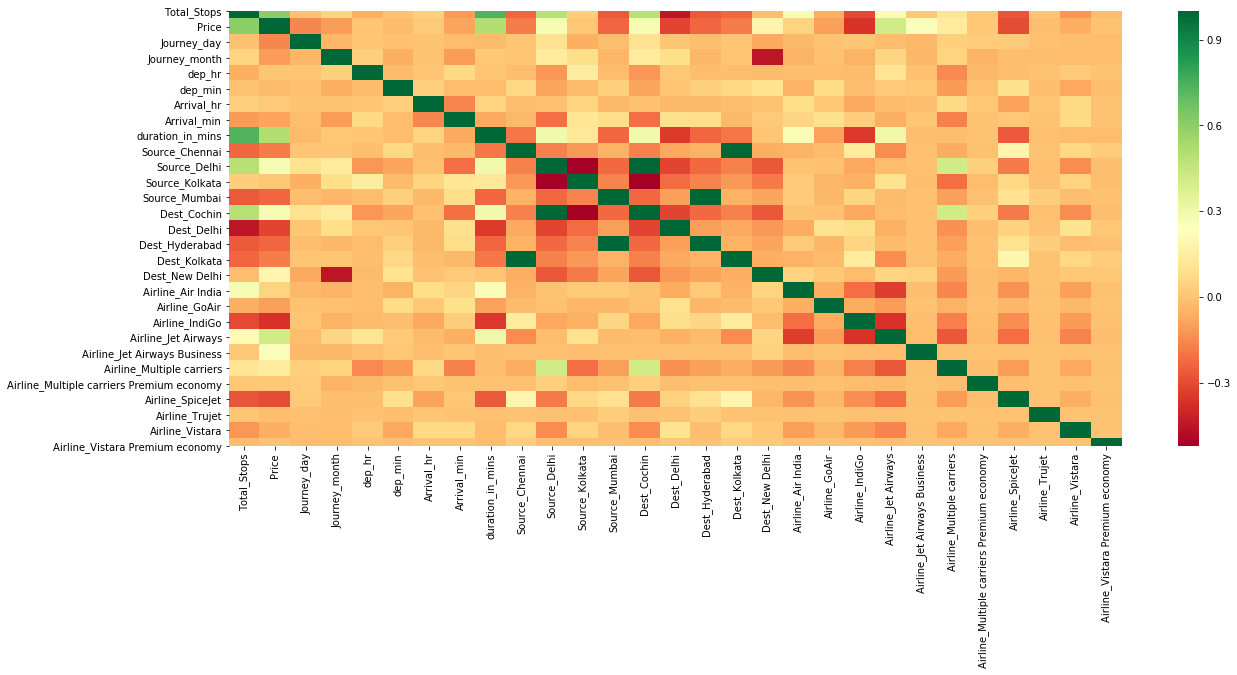

In [111]:
plt.figure(figsize=(20,8))
sns.heatmap(final.corr(),cmap = "RdYlGn")


In [114]:
final.shape

(10682, 29)

## Test Set

In [125]:
test_db=pd.read_excel(r'E:\Work\dataset\flightrate\Test_set.xlsx')
test_db

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [122]:
test_db

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hr,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,24,6,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,6,6,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,27,3,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,6,3,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,6,3,19,15


In [127]:
#extracting date and month from Date_of_journey

test_db["Journey_day"] = pd.to_datetime(test_db['Date_of_Journey'], format = "%d/%m/%Y").dt.day
test_db["Journey_month"] = pd.to_datetime(test_db.Date_of_Journey, format = "%d/%m/%Y").dt.month
test_db.drop('Date_of_Journey',axis=1,inplace=True)

#Extracting hr and ins from Arr_Time
test_db['Arrival_hr']=pd.to_datetime(test_db['Arrival_Time']).dt.hour
test_db['Arrival_min']=pd.to_datetime(test_db['Arrival_Time']).dt.minute
test_db.drop('Arrival_Time',axis=1,inplace=True)
test_db

#Extracting hr and ins from Dep_Time
test_db['Dept_hr']=pd.to_datetime(test_db['Dep_Time']).dt.hour
test_db['Dept_min']=pd.to_datetime(test_db['Dep_Time']).dt.minute
test_db.drop('Dep_Time',axis=1,inplace=True)
test_db

#Duration
tot_duration=list(test_db['Duration'])
for i in range(len(tot_duration)):
    if len(tot_duration[i].split()) != 2:
        if 'h' in tot_duration[i]:
            tot_duration[i]=tot_duration[i].strip()+' 0m'
        else: tot_duration[i]='0h '+tot_duration[i]
            
hrs=[]
hrtomin=[]
mins=[]
tot_mins=[]
for i in range(len(tot_duration)):
    hrs.append(tot_duration[i].split('h')[0])
    hrtomin.append(int(hrs[i])*60)
    mins.append(tot_duration[i].split('m')[0].split()[-1])
    mins[i]=int(mins[i])
    tot_mins.append(hrtomin[i]+mins[i])
tot_mins

test_db['duration_in_mins']=tot_mins
test_db.drop('Duration',axis=1,inplace=True)

airline=pd.get_dummies(test_db['Airline'],prefix='Airline',drop_first=True)
print(airline)
source=pd.get_dummies(test_db['Source'],prefix='Source',drop_first=True)
print(source)
destination=pd.get_dummies(test_db['Destination'],prefix='Dest',drop_first=True)
print(destination)

test_db.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_db.drop(['Route','Additional_Info'],axis=1,inplace=True)

test_db.replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
print(test_db)


      Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                     0              0               0                    1   
1                     0              0               1                    0   
2                     0              0               0                    1   
3                     0              0               0                    0   
4                     0              0               0                    0   
...                 ...            ...             ...                  ...   
2666                  1              0               0                    0   
2667                  0              0               1                    0   
2668                  0              0               0                    1   
2669                  1              0               0                    0   
2670                  0              0               0                    0   

      Airline_Jet Airways Business  Airline_Multipl

In [128]:
final_test=pd.concat([test_db,source,destination,airline],axis=1)

print(final_test)

      Total_Stops  Journey_day  Journey_month  Arrival_hr  Arrival_min  \
0               1            6              6           4           25   
1               1           12              5          10           20   
2               1           21              5          19            0   
3               1           21              5          21            0   
4               0           24              6           2           45   
...           ...          ...            ...         ...          ...   
2666            1            6              6          20           25   
2667            0           27              3          16           55   
2668            1            6              3           4           25   
2669            1            6              3          19           15   
2670            1           15              6          19           15   

      Dept_hr  Dept_min  duration_in_mins  Source_Chennai  Source_Delhi  ...  \
0          17        30        

## Feature Selection

In [130]:
final_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hr',
       'dep_min', 'Arrival_hr', 'Arrival_min', 'duration_in_mins',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Dest_Cochin', 'Dest_Delhi', 'Dest_Hyderabad', 'Dest_Kolkata',
       'Dest_New Delhi', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [134]:
x=final_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'dep_hr',
       'dep_min', 'Arrival_hr', 'Arrival_min', 'duration_in_mins',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Dest_Cochin', 'Dest_Delhi', 'Dest_Hyderabad', 'Dest_Kolkata',
       'Dest_New Delhi', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]
x

,Total_Stops,Journey_day,Journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_in_mins,Source_Chennai,Source_Delhi,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,24,3,22,20,1,10,170,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,445,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,12,5,18,5,23,30,325,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,150,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,155,0,0,...,0,0,0,0,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,180,0,0,...,0,0,1,0,0,0,0,0,0,0
10681,0,1,3,11,30,14,10,160,0,0,...,0,0,0,0,0,0,0,0,1,0


In [136]:
y=final_train.iloc[:,1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [137]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)
selection.


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [138]:
print(selection.feature_importances_)

[2.06311388e-01 1.39683531e-01 5.56856682e-02 2.81876400e-02
 2.64425237e-02 2.84337711e-02 2.46569837e-02 1.23851713e-01
 7.03979847e-04 1.97404481e-03 2.93042209e-03 1.26439828e-02
 1.73594738e-02 1.61011860e-02 6.96749554e-03 4.78876014e-04
 2.51465224e-02 8.22824425e-03 1.31602546e-03 2.04327707e-02
 1.59221562e-01 6.71113394e-02 1.79042631e-02 9.35658718e-04
 1.89326389e-03 8.07074267e-05 5.24685865e-03 7.01047018e-05]


<function matplotlib.pyplot.show(*args, **kw)>

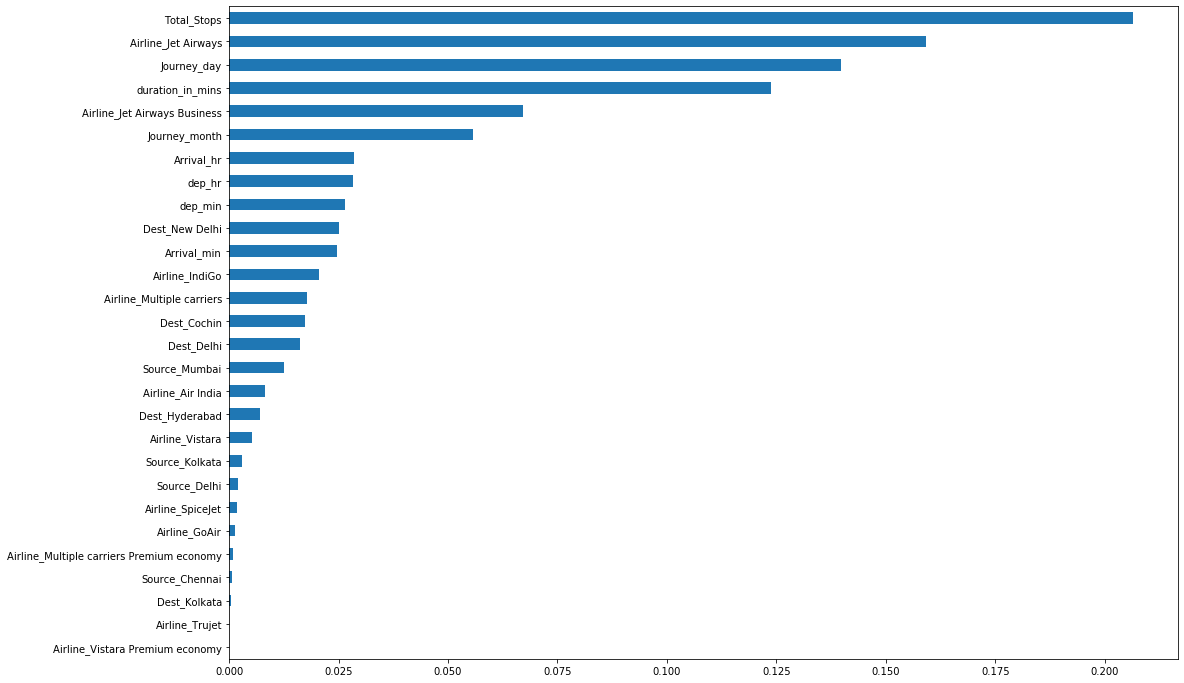

In [146]:
plt.figure(figsize=(17,12))
feature_imp=pd.Series(selection.feature_importances_,index=x.columns)
feature_imp.nsmallest(28).plot(kind='barh')
plt.show

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)


In [187]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [189]:
y_predict=reg_rf.predict(x_test)
reg_rf.score(x_train,y_train)

0.9476376150949315

In [190]:
reg_rf.score(x_test,y_test)

0.8167529889527907

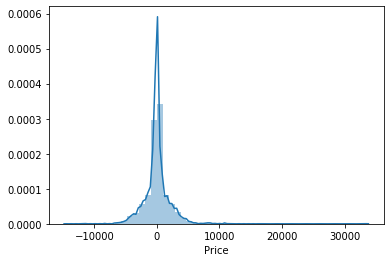

In [193]:
sns.distplot(y_test-y_predict)
plt.show()

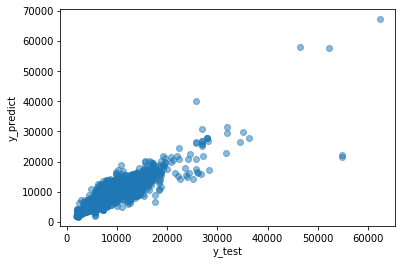

In [203]:
plt.scatter(y_test,y_predict,alpha=.5)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

In [207]:
from sklearn import metrics

In [214]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE:  1204.7043728177698
MSE: 4203261.454247967
RMSE: 2050.185712136334


In [216]:
metrics.r2_score(y_test, y_predict)


0.8167529889527907

## Hyperparaeter Tuning

In [218]:
from sklearn.model_selection import RandomizedSearchCV

In [221]:
#Randomized Search CV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [222]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [223]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [225]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [229]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [231]:
prediction = rf_random.predict(x_test)

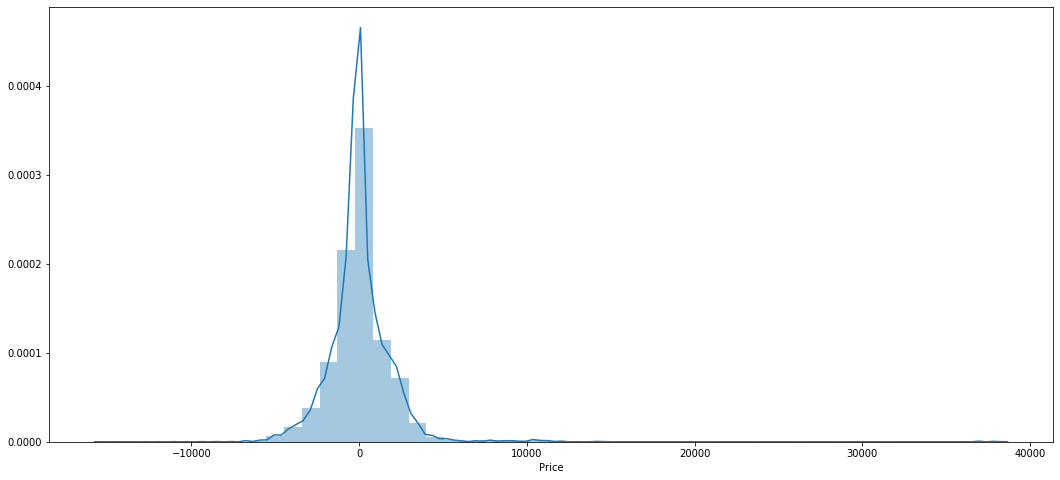

In [235]:
plt.figure(figsize=(18,8))
sns.distplot(y_test-prediction)


<function matplotlib.pyplot.show(*args, **kw)>

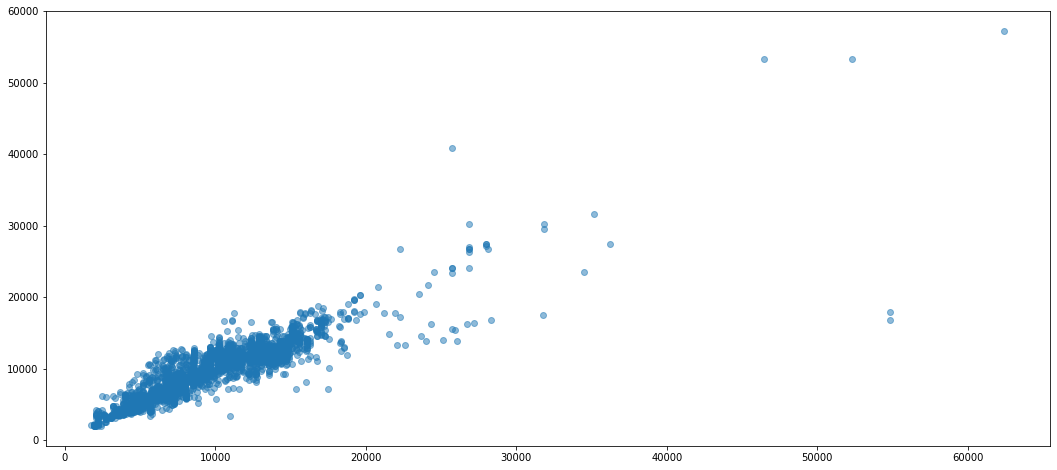

In [238]:
plt.figure(figsize=(18,8))
plt.scatter(y_test,prediction,alpha=.5)
plt.show

In [242]:
metrics.r2_score(y_test,prediction)

0.8276529408413159

In [243]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [245]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [247]:
y_prediction = forest.predict(x_test)

In [248]:
metrics.r2_score(y_test, y_prediction)

0.8276529408413159